In [3]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.io as sio
from temporal_kernel import *
from pyESN import ESN
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from copy import deepcopy
from data_mng import forecasting_data_split, memory_data_split

#%pylab inline

In [4]:
def memory_curve_single(K, N, rho, architecture):
    E_train = []
    E_test = []
    
    
    for k in K:
        data = np.random.randn(3000)    
        x_train, y_train, x_test, y_test = memory_data_split(data, 1000, 500, k)
        
        esn = ESN(n_reservoir = N
                    ,spectral_radius=1
                    ,neuron_activation= 7
                    ,input_scaling = 1
                    #,regularization = 0
                    )
        if architecture == 'random':
            esn.W_in /=  np.linalg.norm(esn.W_in)
            
            esn.W_res *= rho/spectral_radius(esn.W_res)
            
        elif architecture == 'wigner':
            esn.W_in /=  np.linalg.norm(esn.W_in)
            
            esn.W_res = (esn.W_res.T + esn.W_res)/2
            esn.W_res *= rho/spectral_radius(esn.W_res)
        
        elif architecture == 'delay_line':
            esn.W_in /=  np.linalg.norm(esn.W_in)
            
            esn.W_res = np.eye(N, k =-1)
            esn.W_res *= rho
            
        elif architecture == 'cyclic':
            esn.W_in /=  np.linalg.norm(esn.W_in)
            
            esn.W_res = ring_res(N)
            esn.W_res *= rho/spectral_radius(esn.W_res)
            
        else:
            print('NO ARCHITECURE SPECIFIED!')
            break
            
        y_pred = esn.fit(x_train, y_train)
        y_pred_test = esn.predict(x_test)

        train_error = mean_squared_error(y_pred[100:], y_train[100:])
        test_error = mean_squared_error(y_pred_test, y_test)
    
        E_train.append(np.max([1 - np.sqrt(train_error),0] ))
        E_test.append(np.max([1 -np.sqrt(test_error),0]))
        
    return E_train, E_test


def memory_curve(K, N, rho, architecture, reps = 10):
    TRAIN = []
    TEST = []
    for i in range(reps):
        E_train, E_test = memory_curve_single(K, N, rho, architecture)
        
        TRAIN.append(E_train)
        TEST.append(E_test)
        
    TRAIN = np.array(TRAIN)
    TEST = np.array(TEST)
    
    train_mean = np.mean(TRAIN, axis = 0)
    train_std = np.std(TRAIN, axis = 0)
    
    test_mean = np.mean(TEST, axis = 0)
    test_std = np.std(TRAIN, axis = 0)
    
    return train_mean, train_std, test_mean, test_std
    
    





def memory_SR_single(k, N, architecture):
    E_train = []
    E_test = []
    
    
    for rho in np.arange(0,1,0.001):
        data = np.random.randn(3000)   
        x_train, y_train, x_test, y_test = memory_data_split(data, 1000, 500, k)
        
        esn = ESN(n_reservoir = N
                    ,spectral_radius=1
                    ,neuron_activation= 7
                    ,input_scaling = 1
                    #,regularization = 0
                    )
        if architecture == 'random':
            esn.W_in /=  np.linalg.norm(esn.W_in)
            
            esn.W_res *= rho/spectral_radius(esn.W_res)
            
        elif architecture == 'wigner':
            esn.W_in /=  np.linalg.norm(esn.W_in)
            
            esn.W_res = (esn.W_res.T + esn.W_res)/2
            esn.W_res *= rho/spectral_radius(esn.W_res)
        
        elif architecture == 'delay_line':
            esn.W_in /=  np.linalg.norm(esn.W_in)
            
            esn.W_res = np.eye(N, k =-1)
            esn.W_res *= rho
            
        elif architecture == 'cyclic':
            esn.W_in /=  np.linalg.norm(esn.W_in)
            
            esn.W_res = ring_res(N)
            esn.W_res *= rho/spectral_radius(esn.W_res)
            
        else:
            print('NO ARCHITECURE SPECIFIED!')
            break
            
        y_pred = esn.fit(x_train, y_train)
        y_pred_test = esn.predict(x_test)

        train_error = mean_squared_error(y_pred[100:], y_train[100:])
        test_error = mean_squared_error(y_pred_test, y_test)
    
        E_train.append(np.max([1 - np.sqrt(train_error),0] ))
        E_test.append(np.max([1 -np.sqrt(test_error),0]))
        
    return E_train, E_test


def memory_SR(K, N, architecture, reps = 10):
    TRAIN = []
    TEST = []
    for i in range(reps):
        print(i)
        E_train, E_test = memory_SR_single(K, N, architecture)
        
        TRAIN.append(E_train)
        TEST.append(E_test)
        #plt.plot(E_test)
        
    TRAIN = np.array(TRAIN)
    TEST = np.array(TEST)
    
    train_mean = np.mean(TRAIN, axis = 0)
    train_std = np.std(TRAIN, axis = 0)
    
    test_mean = np.mean(TEST, axis = 0)
    test_std = np.std(TRAIN, axis = 0)
    
    return train_mean, train_std, test_mean, test_std
            
        

# Memory Curves
--------


In [5]:
## PARAMETERS
K = range(0,400)
N = 100

N_reps = 10

r_1 = .995
r_2 = .99
r_3 = .95

## Random

In [6]:
E_1_train, S_1_train,  E_1_test, S_1_test  = memory_curve(K,N, r_1, 'random', N_reps)
E_2_train, S_2_train, E_2_test, S_2_test = memory_curve(K,N, r_2, 'random', N_reps)
E_3_train, S_3_train, E_3_test, S_3_test = memory_curve(K,N, r_3, 'random', N_reps)


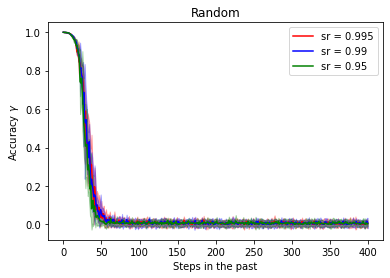

In [7]:
# plt.plot(K, E_1_train, 'r--' )
# plt.fill_between(K, E_1_train - S_1_train, E_1_train + S_1_train,
#                  color='r', alpha=0.3)

plt.plot(K, E_1_test, 'r', label = 'sr = 0.995' )
plt.fill_between(K, E_1_test - S_1_test, E_1_test + S_1_test,
                 color='r', alpha=0.3)

# plt.plot(K, E_2_train, 'b--' )
# plt.fill_between(K, E_2_train - S_2_train, E_2_train + S_2_train,
#                  color='b', alpha=0.3)

plt.plot(K, E_2_test, 'b', label = 'sr = 0.99' )
plt.fill_between(K, E_2_test - S_2_test, E_2_test + S_2_test,
                 color='b', alpha=0.3)

# plt.plot(K, E_3_train, 'g--' )
# plt.fill_between(K, E_3_train - S_3_train, E_3_train + S_3_train,
#                  color='g', alpha=0.3)

plt.plot(K, E_3_test, 'g', label = 'sr = 0.95' )
plt.fill_between(K, E_3_test - S_3_test, E_3_test + S_3_test,
                 color='g', alpha=0.3)

plt.legend()
plt.xlabel('Steps in the past')
plt.ylabel('Accuracy $\gamma$')
plt.title('Random')

## SAVE
plt.savefig('memory_curves_random.pdf', format = 'pdf' )

plt.show()


## Wigner

In [8]:
E_1_train, S_1_train,  E_1_test, S_1_test  = memory_curve(K,N, .995, 'wigner', N_reps)
E_2_train, S_2_train, E_2_test, S_2_test = memory_curve(K,N, .99, 'wigner', N_reps)
E_3_train, S_3_train, E_3_test, S_3_test = memory_curve(K,N, .95, 'wigner', N_reps)




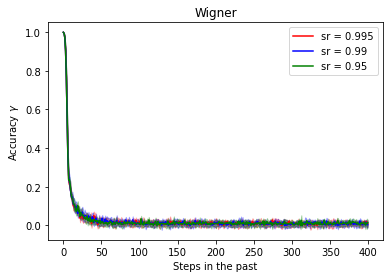

In [9]:
# plt.plot(K, E_1_train, 'r--' )
# plt.fill_between(K, E_1_train - S_1_train, E_1_train + S_1_train,
#                  color='r', alpha=0.3)

plt.plot(K, E_1_test, 'r', label = 'sr = 0.995' )
plt.fill_between(K, E_1_test - S_1_test, E_1_test + S_1_test,
                 color='r', alpha=0.3)

# plt.plot(K, E_2_train, 'b--' )
# plt.fill_between(K, E_2_train - S_2_train, E_2_train + S_2_train,
#                  color='b', alpha=0.3)

plt.plot(K, E_2_test, 'b', label = 'sr = 0.99' )
plt.fill_between(K, E_2_test - S_2_test, E_2_test + S_2_test,
                 color='b', alpha=0.3)

# plt.plot(K, E_3_train, 'g--' )
# plt.fill_between(K, E_3_train - S_3_train, E_3_train + S_3_train,
#                  color='g', alpha=0.3)

plt.plot(K, E_3_test, 'g', label = 'sr = 0.95' )
plt.fill_between(K, E_3_test - S_3_test, E_3_test + S_3_test,
                 color='g', alpha=0.3)

plt.legend()
plt.xlabel('Steps in the past')
plt.ylabel('Accuracy $\gamma$')
plt.title('Wigner')

## SAVE
plt.savefig('memory_curves_wigner.pdf', format = 'pdf' )

plt.show()



## Delay line

In [10]:
E_1_train, S_1_train,  E_1_test, S_1_test  = memory_curve(K,N, .995, 'delay_line', N_reps)
E_2_train, S_2_train, E_2_test, S_2_test = memory_curve(K,N, .99, 'delay_line', N_reps)
E_3_train, S_3_train, E_3_test, S_3_test = memory_curve(K,N, .95, 'delay_line', N_reps)


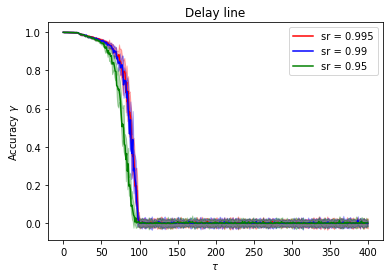

In [11]:
# plt.plot(K, E_1_train, 'r--' )
# plt.fill_between(K, E_1_train - S_1_train, E_1_train + S_1_train,
#                  color='r', alpha=0.3)

plt.plot(K, E_1_test, 'r', label = 'sr = 0.995' )
plt.fill_between(K, E_1_test - S_1_test, E_1_test + S_1_test,
                 color='r', alpha=0.3)

# plt.plot(K, E_2_train, 'b--' )
# plt.fill_between(K, E_2_train - S_2_train, E_2_train + S_2_train,
#                  color='b', alpha=0.3)

plt.plot(K, E_2_test, 'b', label = 'sr = 0.99' )
plt.fill_between(K, E_2_test - S_2_test, E_2_test + S_2_test,
                 color='b', alpha=0.3)

# plt.plot(K, E_3_train, 'g--' )
# plt.fill_between(K, E_3_train - S_3_train, E_3_train + S_3_train,
#                  color='g', alpha=0.3)

plt.plot(K, E_3_test, 'g', label = 'sr = 0.95' )
plt.fill_between(K, E_3_test - S_3_test, E_3_test + S_3_test,
                 color='g', alpha=0.3)

plt.legend()
plt.xlabel(r'$\tau$')
plt.ylabel('Accuracy $\gamma$')
plt.title('Delay line')

## SAVE
plt.savefig('memory_curves_delay_line.pdf', format = 'pdf' )

plt.show()


## Cyclic

In [12]:


E_1_train, S_1_train,  E_1_test, S_1_test  = memory_curve(K,N, r_1, 'cyclic', N_reps)
E_2_train, S_2_train, E_2_test, S_2_test = memory_curve(K,N, r_2, 'cyclic', N_reps)
E_3_train, S_3_train, E_3_test, S_3_test = memory_curve(K,N, r_3, 'cyclic', N_reps)

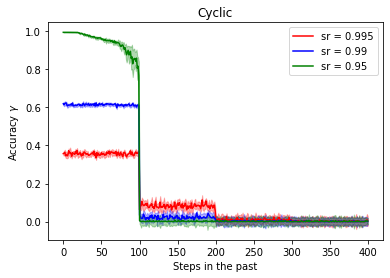

In [13]:
# plt.plot(K, E_1_train, 'r--' )
# plt.fill_between(K, E_1_train - S_1_train, E_1_train + S_1_train,
#                  color='r', alpha=0.3)

plt.plot(K, E_1_test, 'r', label = 'sr = 0.995' )
plt.fill_between(K, E_1_test - S_1_test, E_1_test + S_1_test,
                 color='r', alpha=0.3)

# plt.plot(K, E_2_train, 'b--' )
# plt.fill_between(K, E_2_train - S_2_train, E_2_train + S_2_train,
#                  color='b', alpha=0.3)

plt.plot(K, E_2_test, 'b', label = 'sr = 0.99' )
plt.fill_between(K, E_2_test - S_2_test, E_2_test + S_2_test,
                 color='b', alpha=0.3)

# plt.plot(K, E_3_train, 'g--' )
# plt.fill_between(K, E_3_train - S_3_train, E_3_train + S_3_train,
#                  color='g', alpha=0.3)

plt.plot(K, E_3_test, 'g', label = 'sr = 0.95' )
plt.fill_between(K, E_3_test - S_3_test, E_3_test + S_3_test,
                 color='g', alpha=0.3)

plt.legend()
plt.xlabel('Steps in the past')
plt.ylabel('Accuracy $\gamma$')
plt.title('Cyclic')

## SAVE
plt.savefig('memory_curves_cyclic.pdf', format = 'pdf' )

plt.show()

# MEMORY VS SPECTRAL RADIUS
---------------------------

In [14]:
#PARAMETERS
k_1 = 10
k_2 = 30
k_3 = 50


N = 100

L = np.arange(0,1,0.001)
N_reps = 10


## Random

In [15]:
E_1_train, S_1_train,  E_1_test, S_1_test  = memory_SR(k_1, N, 'random', N_reps)
E_2_train, S_2_train, E_2_test, S_2_test = memory_SR(k_2,N, 'random', N_reps)
E_3_train, S_3_train, E_3_test, S_3_test = memory_SR(k_3,N, 'random', N_reps)



0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


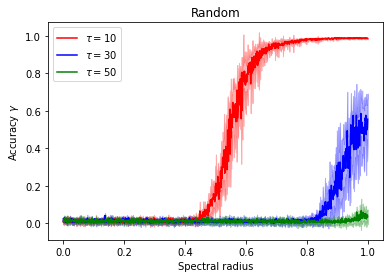

In [16]:
# plt.plot(L, E_1_train, 'r--' )
# plt.fill_between(L, E_1_train - S_1_train, E_1_train + S_1_train,
#                  color='r', alpha=0.3)

plt.plot(L, E_1_test, 'r', label = r'$\tau = 10$' )
plt.fill_between(L, E_1_test - S_1_test, E_1_test + S_1_test,
                 color='r', alpha=0.3)

# plt.plot(L, E_2_train, 'b--' )
# plt.fill_between(L, E_2_train - S_2_train, E_2_train + S_2_train,
#                  color='b', alpha=0.3)

plt.plot(L, E_2_test, 'b', label = r'$\tau = 30$' )
plt.fill_between(L, E_2_test - S_2_test, E_2_test + S_2_test,
                 color='b', alpha=0.3)

# plt.plot(L, E_3_train, 'g--' )
# plt.fill_between(L, E_3_train - S_3_train, E_3_train + S_3_train,
#                  color='g', alpha=0.3)

plt.plot(L, E_3_test, 'g', label = r'$\tau = 50$' )
plt.fill_between(L, E_3_test - S_3_test, E_3_test + S_3_test,
                 color='g', alpha=0.3)

plt.legend()
plt.xlabel('Spectral radius')
plt.ylabel('Accuracy $\gamma$')
plt.title('Random')


## SAVE
plt.savefig('memory_SR_random.pdf', format = 'pdf' )
plt.show()

## Wigner

In [17]:
E_1_train, S_1_train,  E_1_test, S_1_test  = memory_SR(k_1, N, 'wigner', N_reps)
E_2_train, S_2_train, E_2_test, S_2_test = memory_SR(k_2,N, 'wigner', N_reps)
E_3_train, S_3_train, E_3_test, S_3_test = memory_SR(k_3,N, 'wigner', N_reps)


0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


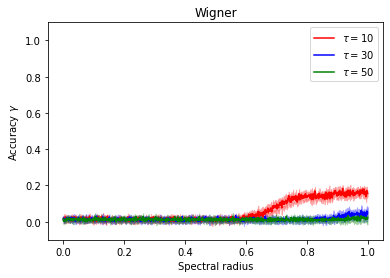

In [18]:
# plt.plot(L, E_1_train, 'r--' )
# plt.fill_between(L, E_1_train - S_1_train, E_1_train + S_1_train,
#                  color='r', alpha=0.3)

plt.plot(L, E_1_test, 'r', label = r'$\tau = 10$' )
plt.fill_between(L, E_1_test - S_1_test, E_1_test + S_1_test,
                 color='r', alpha=0.3)

# plt.plot(L, E_2_train, 'b--' )
# plt.fill_between(L, E_2_train - S_2_train, E_2_train + S_2_train,
#                  color='b', alpha=0.3)

plt.plot(L, E_2_test, 'b', label = r'$\tau = 30$' )
plt.fill_between(L, E_2_test - S_2_test, E_2_test + S_2_test,
                 color='b', alpha=0.3)

# plt.plot(L, E_3_train, 'g--' )
# plt.fill_between(L, E_3_train - S_3_train, E_3_train + S_3_train,
#                  color='g', alpha=0.3)

plt.plot(L, E_3_test, 'g', label = r'$\tau = 50$' )
plt.fill_between(L, E_3_test - S_3_test, E_3_test + S_3_test,
                 color='g', alpha=0.3)


plt.ylim(-0.1,1.1)
plt.legend()
plt.xlabel('Spectral radius')
plt.ylabel('Accuracy $\gamma$')
plt.title('Wigner')

## SAVE
plt.savefig('memory_SR_wigner.pdf', format = 'pdf' )
plt.show()

## Delay line

In [19]:
E_1_train, S_1_train,  E_1_test, S_1_test  = memory_SR(k_1, N, 'delay_line', N_reps)
E_2_train, S_2_train, E_2_test, S_2_test = memory_SR(k_2,N, 'delay_line', N_reps)
E_3_train, S_3_train, E_3_test, S_3_test = memory_SR(k_3,N, 'delay_line', N_reps)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


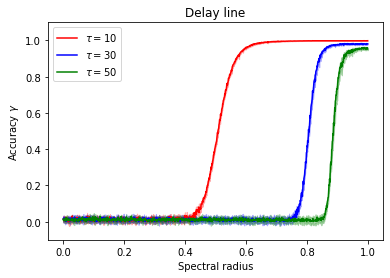

In [20]:
# plt.plot(L, E_1_train, 'r--' )
# plt.fill_between(L, E_1_train - S_1_train, E_1_train + S_1_train,
#                  color='r', alpha=0.3)

plt.plot(L, E_1_test, 'r', label = r'$\tau = 10$' )
plt.fill_between(L, E_1_test - S_1_test, E_1_test + S_1_test,
                 color='r', alpha=0.3)

# plt.plot(L, E_2_train, 'b--' )
# plt.fill_between(L, E_2_train - S_2_train, E_2_train + S_2_train,
#                  color='b', alpha=0.3)

plt.plot(L, E_2_test, 'b', label = r'$\tau = 30$' )
plt.fill_between(L, E_2_test - S_2_test, E_2_test + S_2_test,
                 color='b', alpha=0.3)

# plt.plot(L, E_3_train, 'g--' )
# plt.fill_between(L, E_3_train - S_3_train, E_3_train + S_3_train,
#                  color='g', alpha=0.3)

plt.plot(L, E_3_test, 'g', label = r'$\tau = 50$' )
plt.fill_between(L, E_3_test - S_3_test, E_3_test + S_3_test,
                 color='g', alpha=0.3)

plt.ylim(-0.1,1.1)

plt.legend()
plt.xlabel('Spectral radius')
plt.ylabel('Accuracy $\gamma$')
plt.title('Delay line')


## SAVE
plt.savefig('memory_SR_delay_line.pdf', format = 'pdf' )
plt.show()

## Cyclic



In [21]:
E_1_train, S_1_train,  E_1_test, S_1_test  = memory_SR(k_1, N, 'cyclic', N_reps)
E_2_train, S_2_train, E_2_test, S_2_test = memory_SR(k_2,N, 'cyclic', N_reps)
E_3_train, S_3_train, E_3_test, S_3_test = memory_SR(k_3,N, 'cyclic', N_reps)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9


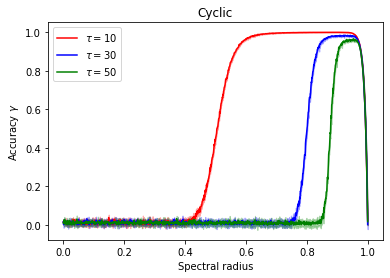

In [22]:
# plt.plot(L, E_1_train, 'r--' )
# plt.fill_between(L, E_1_train - S_1_train, E_1_train + S_1_train,
#                  color='r', alpha=0.3)

plt.plot(L, E_1_test, 'r', label = r'$\tau = 10$' )
plt.fill_between(L, E_1_test - S_1_test, E_1_test + S_1_test,
                 color='r', alpha=0.3)

# plt.plot(L, E_2_train, 'b--' )
# plt.fill_between(L, E_2_train - S_2_train, E_2_train + S_2_train,
#                  color='b', alpha=0.3)

plt.plot(L, E_2_test, 'b', label = r'$\tau = 30$' )
plt.fill_between(L, E_2_test - S_2_test, E_2_test + S_2_test,
                 color='b', alpha=0.3)

# plt.plot(L, E_3_train, 'g--' )
# plt.fill_between(L, E_3_train - S_3_train, E_3_train + S_3_train,
#                  color='g', alpha=0.3)

plt.plot(L, E_3_test, 'g', label = r'$\tau = 50$' )
plt.fill_between(L, E_3_test - S_3_test, E_3_test + S_3_test,
                 color='g', alpha=0.3)
plt.legend()
plt.xlabel('Spectral radius')
plt.ylabel('Accuracy $\gamma$')
plt.title('Cyclic')



## SAVE
plt.savefig('memory_SR_cyclic.pdf', format = 'pdf' )

plt.show()

# Matrix plots

Text(0.5, 1.0, 'Cyclic  - rank = 276')

<Figure size 432x288 with 0 Axes>

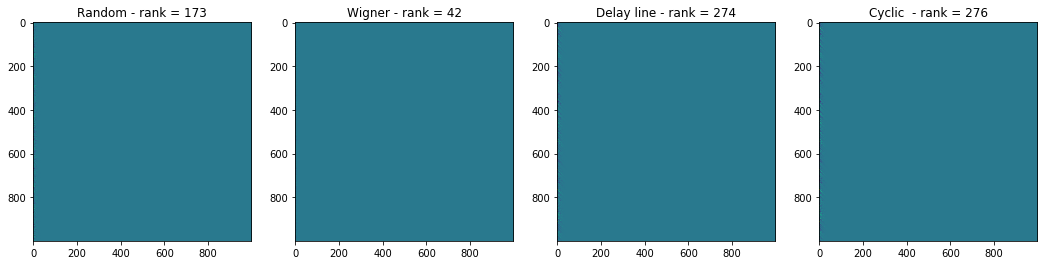

In [53]:
N = 1000

sr = .9

w = np.random.randn(N) / np.sqrt(N)

W_1 = np.random.randn(N,N)/np.sqrt(N)
W_1 *= sr / spectral_radius(W_1)
C_1 = create_C(w, W_1)

W_2 = (W_1.T + W_1)/2
W_2 *= sr / spectral_radius(W_2)
C_2 = create_C(w, W_2)

W_3 = ring_res(N)
W_3 *=  sr / spectral_radius(W_3)
C_3 = create_C(w, W_3)

W_4 = np.eye(N, k =-1)
W_4 *=  sr
C_4 = create_C(w, W_4)

plt.tight_layout()
r1 =np.linalg.matrix_rank(C_1)
# #plot_matrix(C_1, title = "Random W - rank ={}".format(r1), file_name='randomW100' )
r2 = np.linalg.matrix_rank(C_2)
# #plot_matrix(C_2, title = "Wigner W - rank ={}".format(r2), file_name='wignerW100' )
r3 = np.linalg.matrix_rank(C_3)
# #plot_matrix(C_3, title = "Cyclic W - rank ={}".format(r3), file_name='cyclicW100' )
r4 = np.linalg.matrix_rank(C_4)
# #plot_matrix(C_4, title = "Cyclic W - rank ={}".format(r4), file_name='delay_lineW100' )



fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4
                                         , figsize = (18, 5)
                                        )


ax1.imshow(C_1, label = 'random')
ax1.set_title("Random - rank = {}".format(r1))

ax2.imshow(C_2, label = 'wigner')
ax2.set_title("Wigner - rank = {}".format(r2))

ax3.imshow(C_4, label = 'delay_line')
ax3.set_title("Delay line - rank = {}".format(r4))

ax4.imshow(C_3, label = 'cyclic')
ax4.set_title("Cyclic  - rank = {}".format(r3))

#plt.tight_layout()
#fig.savefig('C_matrix_1000.pdf', format = 'pdf', box_inches = 'tight',pad_inches = 0)

#plt.show()


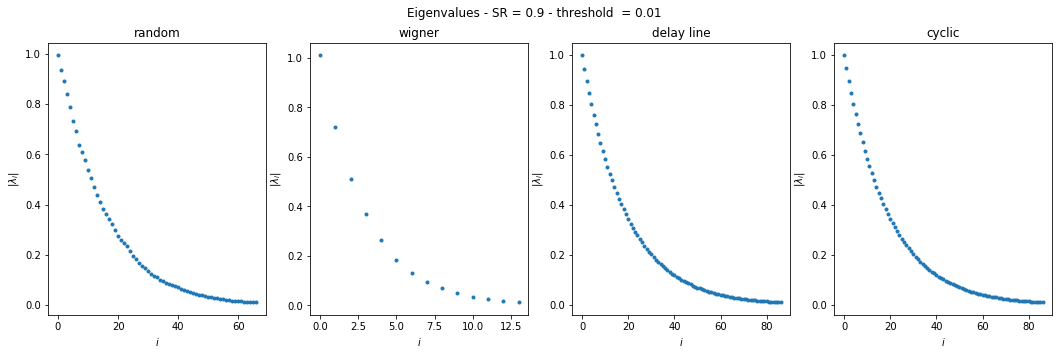

In [54]:
from numpy.linalg import svd

U1,s1, Vh1 = svd(C_1)
U2,s2, Vh2 = svd(C_2)
U3,s3, Vh3 = svd(C_4) #NOTE THE SWAP
U4,s4, Vh4 = svd(C_3) #NOTE THE SWAP

ss = np.sqrt([s1,s2,s3,s4])

fig, axs = plt.subplots(1, 4, figsize = (18, 5))
titles = ['random', 'wigner', 'delay line', 'cyclic']
fig.suptitle('Eigenvalues - SR = 0.9 - threshold  = 0.01')

for ax, val, title in zip(axs,ss, titles):
    ax.plot(val[val>0.01], '.')
    ax.set_title(title)
    ax.set_ylabel(r'$|\lambda_i|$')
    ax.set_xlabel(r'$i$')
    


# NULL SPACES

259


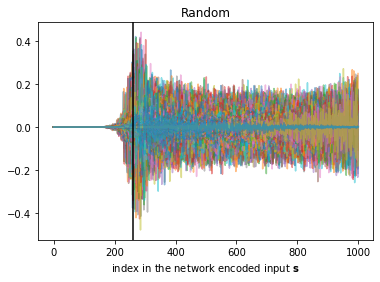

In [94]:
from scipy.linalg import null_space


N = 1000

sr = .995

W = np.random.randn(N,N)/np.sqrt(N)
#W = .5*(W.T + W)
W *= sr / spectral_radius(W)

w = np.random.randn(N)
w /= np.linalg.norm(w)

C = create_C(w, W)

NS = null_space(C).T

print(np.linalg.matrix_rank(C))

plt.plot(NS.T,  alpha = .5)
plt.title('Random')

plt.axvline( x = np.linalg.matrix_rank(C), c ='k')

plt.xlabel(r'index in the network encoded input $\mathbf{s}$ ')
#plt.set_ylabel('value')
#plt.savefig('Random_nullspace .pdf')
plt.show()


In [70]:
from numpy.linalg import matrix_rank

def generate_matrix(W_type, rho, N):
    
    if W_type == 'random':
        
        W = np.random.randn(N,N)
        W *= rho/spectral_radius(W)
        
    elif W_type == 'random_msv':
        W = np.random.randn(N,N)
        U, D, V = np.linalg.svd(W)
        W *= rho/D[0]
      
        
    elif W_type == 'wigner':
        W = np.random.randn(N,N)
        W = (W.T+W)/2
        W *= rho/spectral_radius(W)
             
    elif W_type == 'delay_line':
        W = rho * np.eye(N, k = -1)
        
    elif W_type == 'cyclic':
         W = rho*ring_res(N)
        
    else:
        print("NO VALID W_TYPE!")
        
    return W



def ranks(W_type, rho):
    
    print(W_type, "\n")

    means = []
    variances = []

    range_N = np.arange(10, 1000, 10)
    reps = 10

    for N in range_N:

        if(N %100 == 0):
            print(N)
        ranks = []

        for i in  range(reps):   
            
            W = generate_matrix(W_type,rho, N)

            w = np.random.randn(N)
            w /= np.linalg.norm(w)

            C = create_C(w,W)

            ranks.append(matrix_rank(C))

        means.append(np.mean(ranks))
        variances.append(np.var(ranks))
    
    return means, variances
    
    

In [13]:
rho_1 = .995

random = ranks('random', rho_1)
random_msv = ranks('random_msv', rho_1)
wigner = ranks('wigner', rho_1)
delay_line = ranks('delay_line', rho_1)
cyclic = ranks('cyclic', rho_1)

random 

100
200
300
400
500
600
700
800
900
random_msv 

100
200
300
400
500
600
700
800
900
wigner 

100
200
300
400
500
600
700
800
900
delay_line 

100
200
300
400
500
600
700
800
900
cyclic 

100
200
300
400
500
600
700
800
900


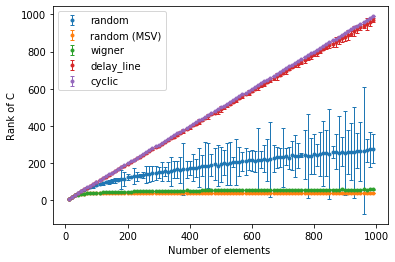

In [14]:
range_N = np.arange(10, 1000, 10)

fig = plt.figure()

plt.errorbar(range_N, random[0], yerr=random[1], fmt='.', elinewidth=1, capsize=2, label = 'random')
plt.errorbar(range_N, random_msv[0], yerr=random_msv[1], fmt='.', elinewidth=1, capsize=2, label = 'random (MSV)')
plt.errorbar(range_N, wigner[0], yerr=wigner[1], fmt='.', elinewidth=1, capsize=2, label = 'wigner')
plt.errorbar(range_N, delay_line[0], yerr=delay_line[1], fmt='.', elinewidth=1, capsize=2, label = 'delay_line')
plt.errorbar(range_N, cyclic[0], yerr=cyclic[1], fmt='.', elinewidth=1, capsize=2, label = 'cyclic')


plt.legend()
plt.xlabel('Number of elements ')
plt.ylabel('Rank of C')
plt.savefig('ranks.pdf')
plt.show()

In [16]:
rho_1 = .9

random = ranks('random', rho_1)
random_msv = ranks('random_msv', rho_1)
wigner = ranks('wigner', rho_1)
delay_line = ranks('delay_line', rho_1)
cyclic = ranks('cyclic', rho_1)

random 

100
200
300
400
500
600
700
800
900
random_msv 

100
200
300
400
500
600
700
800
900
wigner 

100
200
300
400
500
600
700
800
900
delay_line 

100
200
300
400
500
600
700
800
900
cyclic 

100
200
300
400
500
600
700
800
900


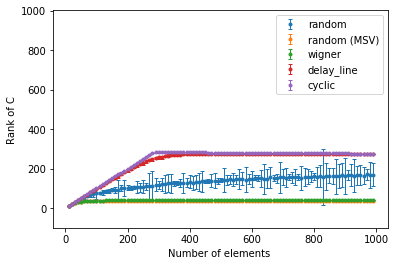

In [19]:
range_N = np.arange(10, 1000, 10)

fig = plt.figure()

plt.errorbar(range_N, random[0], yerr=random[1], fmt='.', elinewidth=1, capsize=2, label = 'random')
plt.errorbar(range_N, random_msv[0], yerr=random_msv[1], fmt='.', elinewidth=1, capsize=2, label = 'random (MSV)')
plt.errorbar(range_N, wigner[0], yerr=wigner[1], fmt='.', elinewidth=1, capsize=2, label = 'wigner')
plt.errorbar(range_N, delay_line[0], yerr=delay_line[1], fmt='.', elinewidth=1, capsize=2, label = 'delay_line')
plt.errorbar(range_N, cyclic[0], yerr=cyclic[1], fmt='.', elinewidth=1, capsize=2, label = 'cyclic')


plt.legend()
plt.xlabel('Number of elements ')
plt.ylabel('Rank of C')
plt.ylim(-100,1001)
plt.savefig('ranks_smallerSR.pdf')
plt.show()